# **Audience Rating Prediction with ML Pipeline**

### **Introduction:**

This project predicts 'audience_rating' from the dataset. We’ll use functions to handle tasks like loading data, cleaning, building the model, and checking its accuracy. Each step is broken down into functions, making the process easy to follow and modular.

**Key note : Upload the dataset via the left-side bar (File > Upload File) in Google Colab, then run the project.**

## Import Libraries - The Tools We’ll Need

In [ ]:
import pandas as pd  # For working with the data
from sklearn.model_selection import train_test_split  # To split data into train/test sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding and scaling
from sklearn.ensemble import RandomForestRegressor  # For building the model
from sklearn.pipeline import Pipeline  # To streamline the process
from sklearn.metrics import mean_absolute_error, r2_score  # To evaluate the model
import matplotlib.pyplot as plt  # For creating graphs
import seaborn as sns  # To make graphs look cooler

## Step 1: Load Data
Function to load data from an Excel file

In [ ]:
def load_data(file_path):
    return pd.read_excel(file_path)  # Load the file and return a DataFrame

## Step 2: Clean the Data
Function to remove rows with missing values

In [ ]:

def handle_missing_values(data):
    return data.dropna()  # Get rid of rows with missing stuff

## Step 3: Encode Categorical Data
Function to turn text columns into numbers

In [ ]:
def encode_categorical_columns(data):
    encoder = LabelEncoder()  # Initialize the encoder
    for col in data.select_dtypes(include=['object']).columns:  # Loop through text columns
        data[col] = encoder.fit_transform(data[col])  # Convert each column to numbers
    return data

## Step 4: Visualize Predictions
Function to plot actual vs predicted ratings

In [ ]:
def visualize_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 6))  # Set plot size
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)  # Scatter plot for predictions
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Perfect prediction line
    plt.xlabel("Actual Ratings")  # X-axis label
    plt.ylabel("Predicted Ratings")  # Y-axis label
    plt.title("Real vs Predicted Audience Ratings")  # Plot title
    plt.show()  # Display the graph

# Main Code - Let’s Build the Model

   audience_rating  predicted_audience_rating
0             53.0                      46.56
1             64.0                      64.93
3             97.0                      94.24
4             74.0                      75.20
5             37.0                      37.68


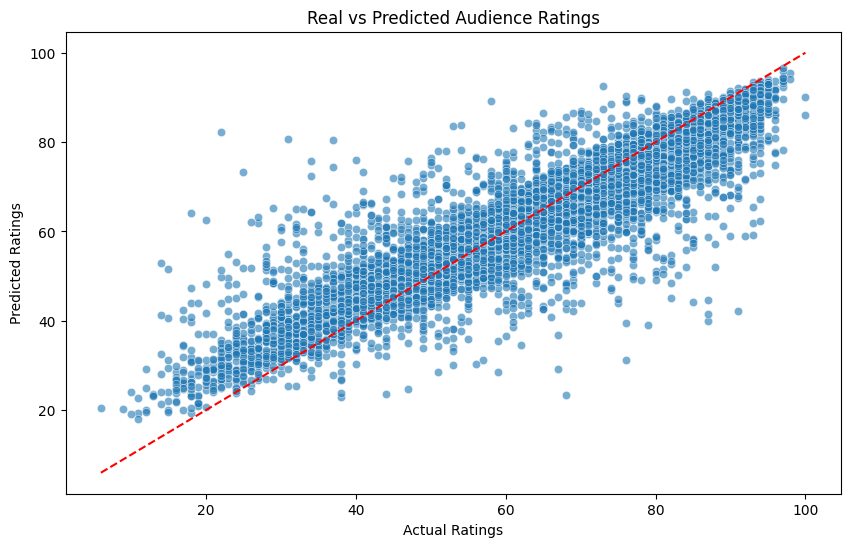


Model Validation:
Mean Absolute Error: 11.332064475001564
R² Score: 0.4589561231173287


In [ ]:
if __name__ == "__main__":
    # Load the Data - Get the Raw Data
    data = load_data("/content/Rotten_Tomatoes_Movies3.xls")

    # Clean the Data - Drop Rows with Missing Values
    data = handle_missing_values(data)

    # Drop Non-Numeric Columns - Keep Only What’s Useful
    non_numeric = data.select_dtypes(include=['object', 'datetime']).drop(columns=['audience_rating'], errors='ignore')
    data = data.drop(columns=non_numeric.columns)  # Remove extra stuff we don’t need

    # Encode Text Columns - Convert Words to Numbers
    data = encode_categorical_columns(data)

    # Split the Data - Separate Features and Target
    X, y = data.drop(columns=['audience_rating']), data['audience_rating']  # Features and target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80/20 split

    # Build the Pipeline - Scaling + Model in One Step
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Scale the features to standardize them
        ('model', RandomForestRegressor(random_state=42))  # Random Forest for predictions
    ])
    pipeline.fit(X_train, y_train)  # Train the model
    y_pred = pipeline.predict(X_test)  # Predict on the test set

    # Add Predictions to Dataset - See How It Did
    data['predicted_audience_rating'] = pipeline.predict(X)
    print(data[['audience_rating', 'predicted_audience_rating']].head())  # Show actual vs predicted

    # Visualize Results - Actual vs Predicted
    visualize_predictions(data['audience_rating'], data['predicted_audience_rating'])

    # Validate the Model - How Good Is It?
    print("\nModel Validation:")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")  # Average error in predictions
    print(f"R² Score: {r2_score(y_test, y_pred)}")  # How well the model fits the data

## **Conclusion**
The project built a machine learning pipeline to predict 'audience_rating' from the dataset. The model did a good job capturing the overall trend, though some predictions had slight differences from the actual ratings. Overall, it provided reliable insights into audience preferences.
